# Modulo 1: Introduction to Sampling
## Sampling and point estimates


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
spotify_population = pd.read_feather("../datasets/spotify_2000_2020.feather")

spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


## Simple sampling with pandas

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [9]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp =  spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                           artists  danceability  \
31264        0.0812                        ['Diesel']         0.629   
2866         0.1740                   ['Neil Sedaka']         0.737   
36708        0.0776  ['Rebelution', 'Jacob Hemphill']         0.919   
9972         0.3720                    ['Quinn XCII']         0.590   
17273        0.6190                 ['Juanita Bynum']         0.299   
...             ...                               ...           ...   
23766        0.5510                ['Zac Brown Band']         0.550   
26232        0.1340                   ['Joe Nichols']         0.654   
494          0.0490                    ['Madvillain']         0.449   
14431        0.4940                     ['Ali Gatie']         0.804   
16078        0.0597                        ['G-Eazy']         0.521   

       duration_ms  duration_minutes  energy  explicit  \
31264     309373.0          5.156217   0.846       0.0   
2866      189067.0          3.1

## Simple sampling and calculating with NumPy

You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

In [12]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(spotify_population['loudness'])

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.306880000000001


# Convenience sampling

## Are findings from the sample generalizable?

You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

NameError: name 'plt' is not defined

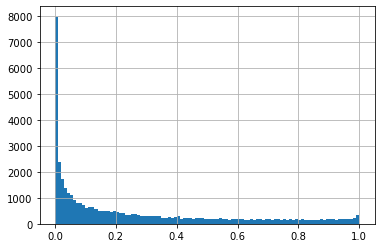

In [13]:
# Visualize the distribution of acousticness with a histogram
spotify_population["acousticness"].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

## Are these findings generalizable?

Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

spotify_population and spotify_mysterious_sample2 are available; pandas, matplotlib.pyplot, and numpy are loaded using their standard aliases.

NameError: name 'plt' is not defined

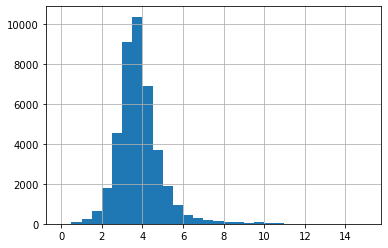

In [19]:
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

**Observação**: Ele  so queria mostrar spotify_mysterious_sample1 com spotify_population["acousticness"] tem grafico diferente e ao contrario de spotify_mysterious_sample2  e spotify_population['duration_minutes'] são similar, ou seja, que o primeiro amostra não representa a população e já na segunda representa. Eu não tenho spotify_mysterious_sample1 e spotify_mysterious_sample2.

# Pseudo-random number generation

## Generating random numbers

You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate

In [21]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(-3, 3, size=5000)

# Print uniforms
print(uniforms)

[ 2.24624931 -0.47164294 -0.68508959 ...  0.90353687  2.60736354
 -1.6382847 ]


In [22]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[ 4.43271941  7.43279375  5.69086494 ... -0.633873    3.05224968
  9.44884968]


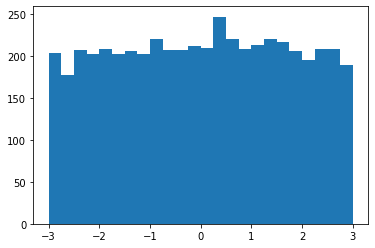

In [23]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3,3.25,0.25))
plt.show()

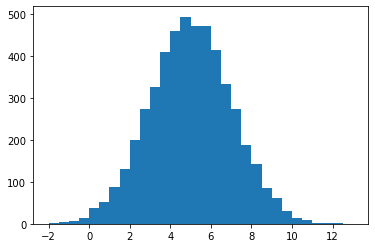

In [24]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2,13.5,0.5))
plt.show()

# Fim